In [1]:
from model import CRNN
from Dataset.CropDataset import CropDataset, GeneratedDataset, CommonDataset
from transforms import get_transforms
import torch
import string
import matplotlib.pyplot as plt

alphabet = 'ABEKMHOPCTYX' + '0123456789' + '-'

MODEL_PARAMS = {
    'image_height': 32,
    'number_input_channels': 1,
    'number_class_symbols': len(alphabet),
    'rnn_size': 64
}

model_data = torch.load('logs/checkpoints/best_full.pth')
model = CRNN(**MODEL_PARAMS)
model.load_state_dict(model_data['model_state_dict'])

device=torch.device('cpu:0')

#dataset = CropDataset(transforms=get_transforms(device), cached=False)
#dataset = GeneratedDataset(transforms=get_transforms(device), cached=False)
dataset = CommonDataset(transforms=get_transforms(device), cached=False)

nb 4134
neg 750
gen 4994


In [2]:
len(dataset.Train)

6900

In [3]:
ds = dataset.Test[1231]
ds1 = dataset.Test[35]
ds[0].shape

(1, 32, 80)

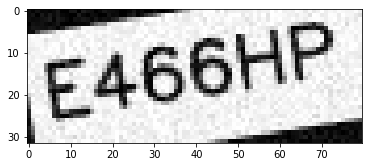

In [4]:
plt.imshow(ds[0][0], cmap='gray')

In [5]:
result = model(torch.Tensor([ds[0], ds1[0]]))
result.shape, len(alphabet)

(torch.Size([22, 2, 23]), 23)

In [6]:
values, indexes = result.max(0)

print(values)
print(indexes)

tensor([[ 0.0000e+00, -1.0897e+01, -8.4758e+00, -9.5005e-05, -9.8548e+00,
         -1.0689e+01, -1.2438e-03, -8.8340e+00, -4.1226e-04, -9.7915e+00,
         -1.0346e+01, -7.0707e+00, -1.1675e+01, -3.9730e+00, -9.1751e+00,
         -1.0380e+01, -1.1749e+01, -2.0204e-04, -9.9150e+00, -1.7582e-04,
         -1.0153e+01, -1.0169e+01, -7.8276e+00],
        [-1.1921e-07, -6.5818e-01, -5.2442e+00, -2.4536e-02, -1.5259e+00,
         -6.3998e+00, -4.6745e+00, -4.6207e+00, -3.8470e-02, -6.9787e+00,
         -4.5408e+00, -4.6037e+00, -1.4231e+00, -4.8702e+00, -2.5630e+00,
         -7.4137e-02, -2.3480e+00, -6.8963e-04, -6.1070e+00, -1.3850e-02,
         -4.0257e+00, -3.5712e+00, -6.5498e+00]], grad_fn=<MaxBackward0>)
tensor([[15, 20, 21,  0, 20, 20, 20, 21, 21,  0, 20, 20, 20, 11,  5,  5, 11,  5,
         11,  8,  6,  9, 11],
        [14,  0, 21, 20,  0,  0,  0, 21, 21, 20, 21,  0,  0,  9,  5,  7,  5, 11,
          5,  9,  5,  5,  5]])


In [7]:
indexes = indexes.numpy()[0]
indexes

array([15, 20, 21,  0, 20, 20, 20, 21, 21,  0, 20, 20, 20, 11,  5,  5, 11,
        5, 11,  8,  6,  9, 11])

In [8]:
from converter import strLabelConverter

converter = strLabelConverter(alphabet)

preds_size = torch.IntTensor([result.size(0)] * 2)
_, preds = result.max(2)
preds = preds.transpose(1, 0).contiguous().view(-1)
sim_preds = converter.decode(preds, preds_size, raw=False)

res = "".join([alphabet[i] for i in indexes])
res, sim_preds, type(sim_preds)

('389A88899A888XHHXHXCOTX', ['E466HP', 'A264EP'], list)